# Manuscript Figures

---

In [1]:
import matplotlib

In [2]:
matplotlib.use('Agg')

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

In [6]:
import numpy as np

In [7]:
import os

In [8]:
from sklearn import metrics

---

## Figure 1

Workflow schematic.

An example functional gene network *Figure 1 net.cys* was constructed in Cytoscape. A ROC curve for genetic interaction predictability is to be constructed from this network. The set of interactors &Omega; = {gene B, gene C, gene D}, and the LLS score of genes connected to &Omega are:

$$\sum_{g\in\Omega} LLS_{g,A} = 5.5 + 5.5 + 3 = 14$$
$$\sum_{g\in\Omega} LLS_{g,B} = 5 + 5.5 = 10.5$$
$$\sum_{g\in\Omega} LLS_{g,C} = 5 + 5 = 10$$
$$\sum_{g\in\Omega} LLS_{g,D} = 5.5 + 5 = 10.5$$
$$\sum_{g\in\Omega} LLS_{g,E} = 3 + 5.5 + 5.5 = 14$$

The true labels and target scores (in alphabetical order) are:

In [10]:
scores = np.array([14, 10.5, 10, 10.5, 14] + 13*[0])
trueLabels = np.array([0, 1, 1, 1, 0] + 13*[0])

Calculate AUC and plot ROC curve:

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(trueLabels, scores)
rocauc = metrics.auc(fpr, tpr)

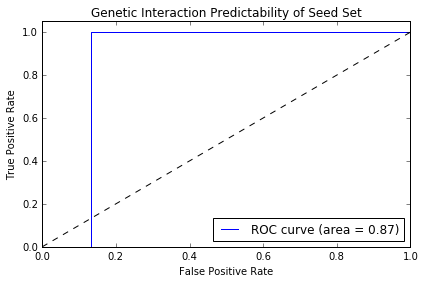

In [13]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %rocauc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Genetic Interaction Predictability of Seed Set')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('Figure 1 ROC.svg')
plt.show()

## Figure 2

**2015 December 14**

Human genetic interaction predictability AUC plots, with functional networks cluster for high AUC seed genes.

In [9]:
os.chdir(os.path.join('..', 'src'))

In [10]:
import func_net_pred

In [11]:
netfile = 'H6Net_CC.net'

In [12]:
experimentSys = 'Phenotypic Enhancement'

In [13]:
biogridfile = 'BIOGRID-3.4.130-human.txt'

Get predictive seed sets:

In [14]:
node2edgewt = func_net_pred.process_func_net(netfile)
gene2idx = func_net_pred.assign_gene_indices(node2edgewt)
adjMat = func_net_pred.build_netwk_adj_matrix(node2edgewt, gene2idx)
seedSets = func_net_pred.read_biogrid(experimentSys, biogridfile)
seedAUC, seed2intacts = func_net_pred.seed_set_predictability(gene2idx, adjMat, seedSets)

Number of genes in interactions: 253


In [16]:
len(seedAUC)

207

Examine which seed to pick:

In [30]:
[(seedAUC[i], len(seed2intacts[seedAUC[i][1]])) for i in range(172, 185)]

[((0.82810997707270162, '4654'), 3),
 ((0.83138266400414162, '5599'), 3),
 ((0.85075244649166637, '1387'), 12),
 ((0.87047206967326796, '7006'), 4),
 ((0.8716582562736408, '2033'), 13),
 ((0.91046232085067058, '22938'), 6),
 ((0.97845943347385556, '7031'), 3),
 ((0.98086416329247328, '4088'), 2),
 ((0.98197348715957622, '4087'), 2),
 ((0.98291641244661376, '7124'), 2),
 ((0.98851849797548408, '7704'), 2),
 ((0.98885129513561476, '6047'), 2),
 ((0.99517444117810194, '1950'), 2)]

Read in functional network and write out seed cluster edges for import into Cytoscape:

In [22]:
fnetpath = os.path.join('..', '..', 'DataDownload', 'FunctionalNet', netfile)
fnet = [tuple(line.split('\t')) for line in open(fnetpath)]

In [35]:
seed = '22938'
edgeset = set()
for intactor in seed2intacts[seed]:
    edgeset.update([netedge for netedge in fnet if intactor in netedge])

In [48]:
len(edgeset)

1063

Clearly, the edge list needs to be pared down.

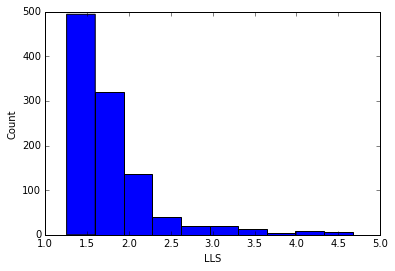

In [50]:
plt.hist([float(edge[2]) for edge in edgeset])
plt.xlabel('LLS')
plt.ylabel('Count')
plt.show()

In [51]:
edgelist = [edge for edge in edgeset if float(edge[2]) > 3.0]

In [52]:
len(edgelist)

51

In [46]:
seed2intacts['22938']

['4089', '4087', '4088', '10499', '8106', '8648']

In [54]:
os.chdir(os.path.join('..', 'doc'))

In [56]:
writefile = open('Figure_2_pheno_enhance_edges.txt', 'w')
writefile.writelines(['\t'.join(edge) for edge in edgelist])
writefile.close()